## K-Means Uygulaması

### Kütüphanelerin yüklenmesi

In [1]:
# Kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# uyarıları kapatalım.
import warnings
warnings.filterwarnings("ignore")

### Veri seti oluşturalım

In [2]:
# veri seti oluştur
# kume1
x1 = np.random.normal(25, 5, 1000)
y1 = np.random.normal(25, 5, 1000)
# kume2
x2 = np.random.normal(55, 5, 1000)
y2 = np.random.normal(60, 5, 1000)
# kume3
x3 = np.random.normal(55, 5, 1000)
y3 = np.random.normal(15, 5, 1000)
# çizim için birleştirelim
x = np.concatenate((x1, x2, x3), axis = 0)
y = np.concatenate((y1, y2, y3), axis = 0)
# data frame oluşturalım
dictionary = {"x" : x, "y" : y}
data = pd.DataFrame(dictionary)
data.head()

,x,y
0,32.118659,26.068253
1,30.994534,26.264169
2,23.652964,21.739512
3,29.428432,21.293711
4,26.782834,26.457088


### Görselleştirelim

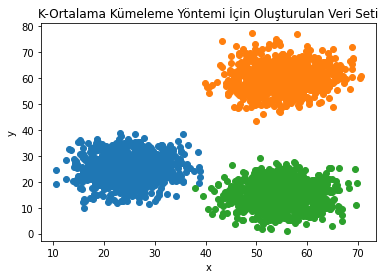

In [3]:
# görselleştirelim
plt.figure()
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3, y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Ortalama Kümeleme Yöntemi İçin Oluşturulan Veri Seti")
plt.show()

### k-means veriyi bu şekilde görecek

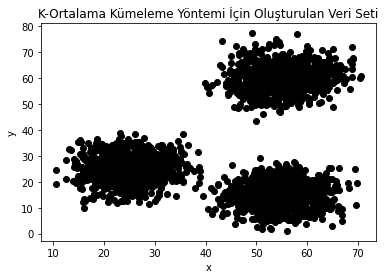

In [4]:
# k ortalama veriyi nasıl görecek?
plt.figure()
plt.scatter(x1, y1, color = "black")
plt.scatter(x2, y2, color = "black")
plt.scatter(x3, y3, color = "black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Ortalama Kümeleme Yöntemi İçin Oluşturulan Veri Seti")
plt.show()

### k değerlerini bulalım ve en uygunu seçelim

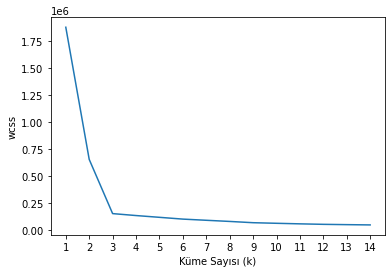

In [5]:
# k ortalamayı içe aktar
from sklearn.cluster import KMeans
wcss = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# k değerlerini görelim.
plt.figure()
plt.plot(range(1, 15), wcss)
plt.xticks(range(1, 15))
plt.xlabel("Küme Sayısı (k)")
plt.ylabel("wcss")
plt.show()

### k=3 için yapalım

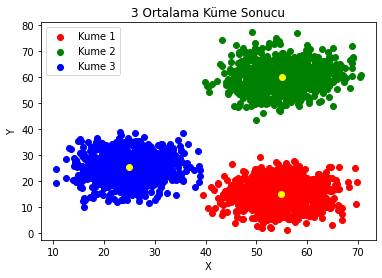

In [6]:
# k=3 için eğitip, görselleştirelim.
k_ortalama = KMeans(n_clusters = 3)
kumeler = k_ortalama.fit_predict(data)
data["label"] = kumeler
# görsel
plt.figure()
plt.scatter(data.x[data.label == 0], data.y[data.label == 0], 
    color = "red", label = "Kume 1")
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], 
    color = "green", label = "Kume 2")
plt.scatter(data.x[data.label == 2], data.y[data.label == 2], 
    color = "blue", label = "Kume 3")
plt.scatter(k_ortalama.cluster_centers_[:,0], k_ortalama.cluster_centers_[:, 1], color = "yellow")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("3 Ortalama Küme Sonucu")
plt.show()